In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data= pd.read_csv("heart_2020_cleaned.csv")
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [4]:
data.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [5]:
data.shape

(319795, 18)

In [6]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
HeartDisease,319795,2,No,292422,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BMI,319795,NaN,NaN,NaN,28.3254,6.3561,12.02,24.03,27.34,31.42,94.85
Smoking,319795,2,No,187887,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AlcoholDrinking,319795,2,No,298018,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Stroke,319795,2,No,307726,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PhysicalHealth,319795,NaN,NaN,NaN,3.37171,7.95085,0,0,0,2,30
MentalHealth,319795,NaN,NaN,NaN,3.89837,7.95524,0,0,0,3,30
DiffWalking,319795,2,No,275385,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,319795,2,Female,167805,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AgeCategory,319795,13,65-69,34151,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
data.duplicated().sum()

18078

In [8]:
data.drop_duplicates(inplace=True)
data.duplicated().sum()

0

In [9]:
data.shape

(301717, 18)

In [10]:
data.isna().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [11]:
data['Diabetic'].value_counts()

No                         251796
Yes                         40589
No, borderline diabetes      6776
Yes (during pregnancy)       2556
Name: Diabetic, dtype: int64

In [12]:
data=data.replace("No",0)
data=data.replace("Yes",1)
data=data.replace("Male",0)
data=data.replace("Female",1)
data=data.replace("No, borderline diabetes",0)
data=data.replace("Yes (during pregnancy)",1)

In [13]:
data['AgeCategory'].value_counts()


65-69          31670
60-64          31219
70-74          29273
55-59          27610
50-54          23736
80 or older    23352
75-79          20713
45-49          20518
18-24          19998
40-44          19837
35-39          19526
30-34          17953
25-29          16312
Name: AgeCategory, dtype: int64

In [14]:
data['GenHealth'].value_counts()

Very good    104796
Good          91239
Excellent     59737
Fair          34659
Poor          11286
Name: GenHealth, dtype: int64

In [15]:
data['Asthma'].value_counts()

0    259066
1     42651
Name: Asthma, dtype: int64

In [16]:
data['KidneyDisease'].value_counts()

0    289941
1     11776
Name: KidneyDisease, dtype: int64

In [17]:
data['SkinCancer'].value_counts()

0    272425
1     29292
Name: SkinCancer, dtype: int64

In [18]:
data['Race'].value_counts()

White                             227724
Hispanic                           27107
Black                              22810
Other                              10891
Asian                               7993
American Indian/Alaskan Native      5192
Name: Race, dtype: int64

In [19]:
data['Race'].replace({'White':0,'Hispanic':1,'Black':2,'Asian':3,'American Indian/Alaskan Native':4,'Other':5}, inplace=True)

In [20]:
data['GenHealth'].replace({'Excellent':0,'Very good':1,'Good':2,'Fair':3,'Poor':4}, inplace=True)

In [21]:

data['AgeCategory'].replace({'18-24':0,'25-29':1,'30-34':2,'35-39':3,'40-44':4,'45-49':5,'50-54':6,'55-59':7,'60-64':8,'65-69':9,'70-74':10,'75-79':11,'80 or older':12}, inplace=True)

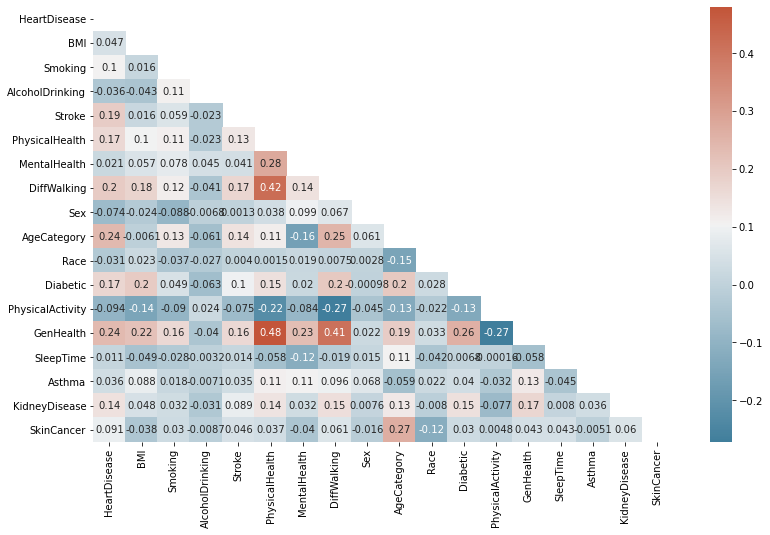

In [22]:
plt.figure(figsize=(13,8))
mask = np.triu(np.ones_like(data.corr(), dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(data.corr(), mask=mask, cmap=cmap, annot=True)
plt.show()

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier

In [24]:
train, test = train_test_split(data,stratify=data['HeartDisease'],test_size=.2,random_state=0)

In [25]:
train.shape ,test.shape

((241373, 18), (60344, 18))

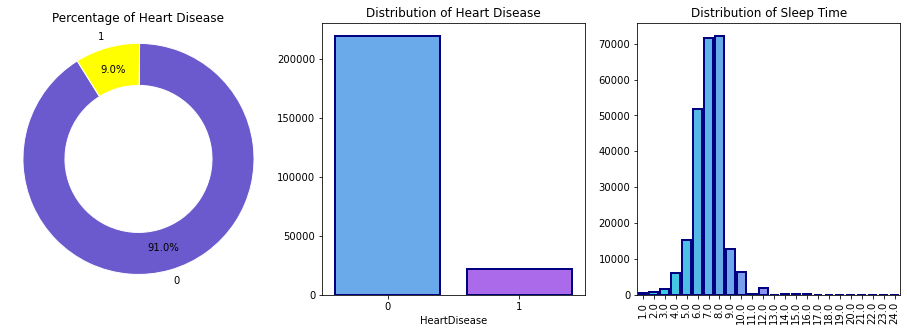

In [26]:
plt.subplots(1,3,figsize=(16,5))
plt.subplot(131)
x = train['HeartDisease'].value_counts()
colors = ["slateblue", "yellow"]
plt.pie(x.values, startangle=122, labels=[0,1], wedgeprops={"edgecolor":"white", "width":0.4}, radius=1.1, colors=colors, autopct="%1.1f%%", pctdistance=0.8)
plt.title('Percentage of Heart Disease')
plt.subplot(132)
sns.countplot(train['HeartDisease'], palette="cool", linewidth=2.0, edgecolor="navy")
plt.ylabel('')
plt.title('Distribution of Heart Disease')
plt.subplot(133)
sns.countplot(train['SleepTime'], palette="cool", linewidth=2.0, edgecolor="navy")
plt.xticks(rotation=90)
plt.xlabel('')
plt.ylabel('')
plt.title('Distribution of Sleep Time')
plt.show()

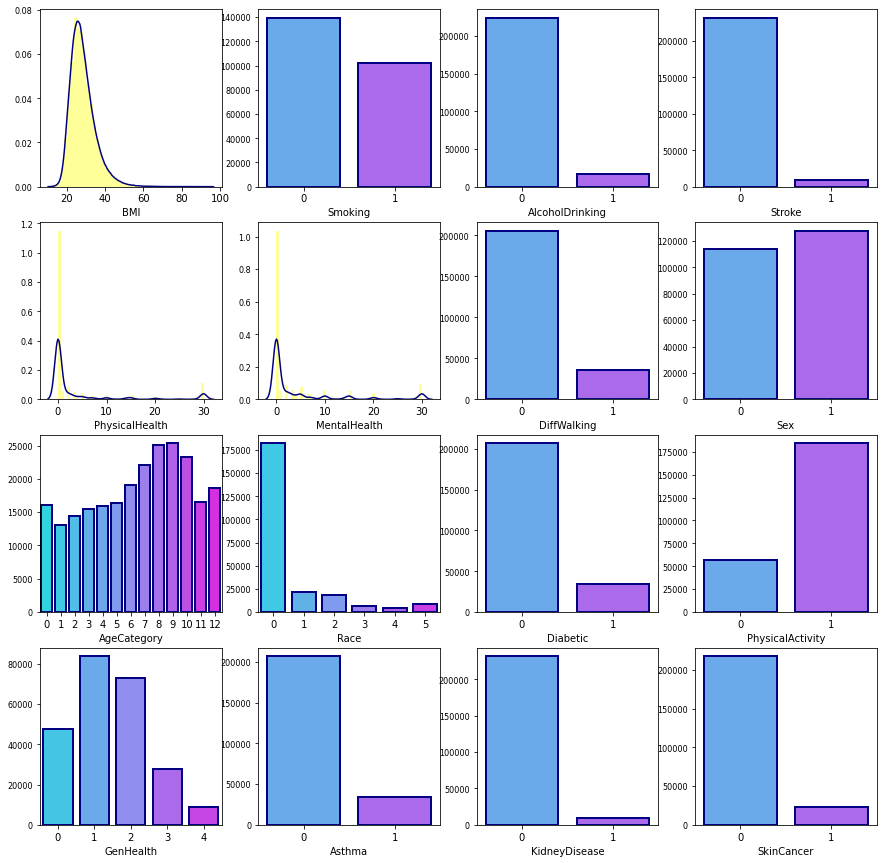

In [27]:
plt.subplots(4,4,figsize=(15,15))
plt.subplot(441)
sns.distplot(train['BMI'], color='yellow', kde=True, kde_kws={'color':'navy'})
plt.ylabel('')
plt.yticks(fontsize=8)
plt.subplot(442)
x = train['Smoking'].value_counts()
sns.countplot(train['Smoking'],palette="cool", linewidth=2.0, edgecolor="navy")
plt.ylabel('')
plt.yticks(fontsize=8)
plt.subplot(443)
sns.countplot(train['AlcoholDrinking'],palette="cool", linewidth=2.0, edgecolor="navy")
plt.ylabel('')
plt.yticks(fontsize=8)
plt.subplot(444)
sns.countplot(train['Stroke'], palette="cool", linewidth=2.0, edgecolor="navy")
plt.ylabel('')
plt.yticks(fontsize=8)
plt.subplot(445)
sns.distplot(train['PhysicalHealth'], color='yellow', kde=True, kde_kws={'color':'navy'})
plt.ylabel('')
plt.yticks(fontsize=8)
plt.subplot(446)
sns.distplot(train['MentalHealth'], color='yellow', kde=True, kde_kws={'color':'navy'})
plt.ylabel('')
plt.yticks(fontsize=8)
plt.subplot(447)
sns.countplot(train['DiffWalking'], palette="cool", linewidth=2.0, edgecolor="navy")
plt.ylabel('')
plt.yticks(fontsize=8)
plt.subplot(448)
sns.countplot(train['Sex'], palette="cool", linewidth=2.0, edgecolor="navy")
plt.ylabel('')
plt.yticks(fontsize=8)
plt.subplot(4,4,9)
sns.countplot(train['AgeCategory'], palette="cool", linewidth=2.0, edgecolor="navy")
plt.ylabel('')
plt.yticks(fontsize=8)
plt.subplot(4,4,10)
sns.countplot(train['Race'], palette="cool", linewidth=2.0, edgecolor="navy")
plt.ylabel('')
plt.yticks(fontsize=8)
plt.subplot(4,4,11)
sns.countplot(train['Diabetic'], palette="cool", linewidth=2.0, edgecolor="navy")
plt.ylabel('')
plt.yticks(fontsize=8)
plt.subplot(4,4,12)
sns.countplot(train['PhysicalActivity'], palette="cool", linewidth=2.0, edgecolor="navy")
plt.ylabel('')
plt.yticks(fontsize=8)
plt.subplot(4,4,13)
sns.countplot(train['GenHealth'], palette="cool", linewidth=2.0, edgecolor="navy")
plt.ylabel('')
plt.yticks(fontsize=8)
plt.subplot(4,4,14)
sns.countplot(train['Asthma'], palette="cool", linewidth=2.0, edgecolor="navy")
plt.ylabel('')
plt.yticks(fontsize=8)
plt.subplot(4,4,15)
sns.countplot(train['KidneyDisease'], palette="cool", linewidth=2.0, edgecolor="navy")
plt.ylabel('')
plt.yticks(fontsize=8)
plt.subplot(4,4,16)
sns.countplot(train['SkinCancer'], palette="cool", linewidth=2.0, edgecolor="navy")
plt.ylabel('')
plt.yticks(fontsize=8)
plt.show()

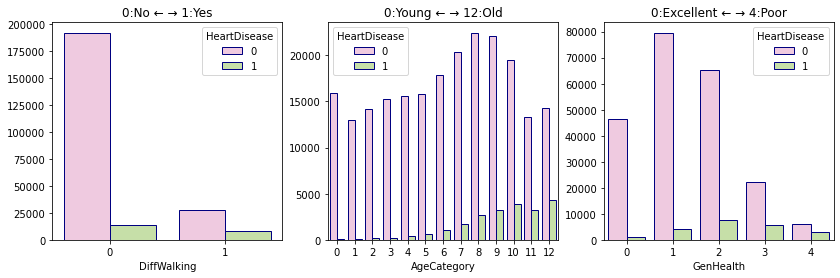

In [28]:
plt.subplots(1,3,figsize=(14,4))

plt.subplot(1,3,1)
sns.countplot(train['DiffWalking'], hue=train['HeartDisease'],palette="PiYG", linewidth=1.0, edgecolor="navy")
plt.title('0:No ← → 1:Yes')
plt.ylabel('')
plt.subplot(1,3,2)
sns.countplot(train['AgeCategory'], hue=train['HeartDisease'],palette="PiYG", linewidth=1.0, edgecolor="navy")
plt.title('0:Young ← → 12:Old')
plt.ylabel('')
plt.subplot(1,3,3)
sns.countplot(train['GenHealth'], hue=train['HeartDisease'],palette="PiYG", linewidth=1.0, edgecolor="navy")
plt.title('0:Excellent ← → 4:Poor')
plt.ylabel('')
plt.show()

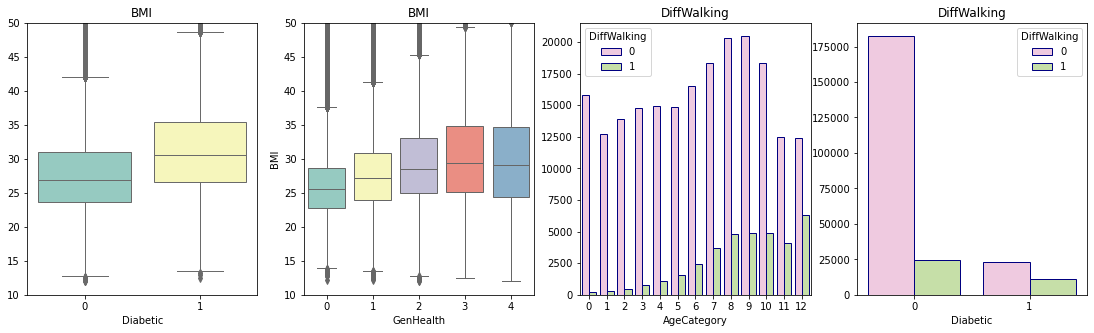

In [29]:
plt.subplots(1,4,figsize=(19,5))
plt.subplot(1,4,1)
sns.boxplot(x=train['Diabetic'],y=train['BMI'],linewidth=1,palette='Set3')
plt.ylim(ymin=10,ymax=50)
plt.title('BMI')
plt.ylabel('')
plt.subplot(1,4,2)
sns.boxplot(x=train['GenHealth'],y=train['BMI'],linewidth=1,palette='Set3')
plt.title('BMI')
plt.ylim(ymin=10,ymax=50)
plt.subplot(1,4,3)
sns.countplot(train['AgeCategory'], hue=train['DiffWalking'],palette="PiYG", linewidth=1.0, edgecolor="navy")
plt.ylabel('')
plt.title('DiffWalking')
plt.subplot(1,4,4)
sns.countplot(train['Diabetic'], hue=train['DiffWalking'],palette="PiYG", linewidth=1.0, edgecolor="navy")
plt.ylabel('')
plt.title('DiffWalking')

plt.show()

Text(0.5, 1.0, 'AgeCategory')

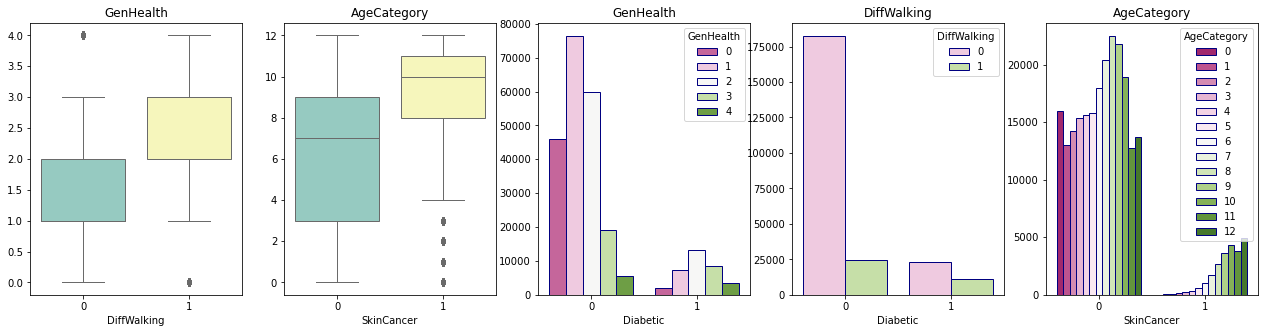

In [30]:
plt.subplots(1,5,figsize=(22,5))
plt.subplot(1,5,1)
sns.boxplot(x=train['DiffWalking'],y=train['GenHealth'],linewidth=1,palette='Set3')
plt.title('GenHealth')
plt.ylabel('')
plt.subplot(1,5,2)
sns.boxplot(x=train['SkinCancer'],y=train['AgeCategory'],linewidth=1,palette='Set3')
plt.ylabel('')
plt.title('AgeCategory')
plt.subplot(1,5,3)
sns.countplot(train['Diabetic'], hue=train['GenHealth'],palette="PiYG", linewidth=1.0, edgecolor="navy")
plt.ylabel('')
plt.title('GenHealth')
plt.subplot(1,5,4)
sns.countplot(train['Diabetic'], hue=train['DiffWalking'],palette="PiYG", linewidth=1.0, edgecolor="navy")
plt.ylabel('')
plt.title('DiffWalking')
plt.subplot(1,5,5)
sns.countplot(train['SkinCancer'], hue=train['AgeCategory'],palette="PiYG", linewidth=1.0, edgecolor="navy")
plt.ylabel('')
plt.title('AgeCategory')

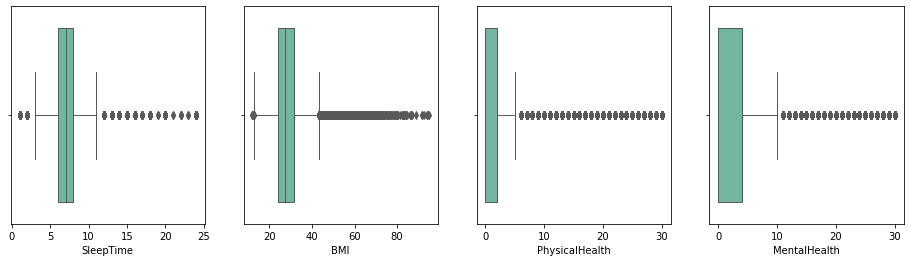

In [31]:
plt.subplots(1,4,figsize=(16,4))

plt.subplot(141)
sns.boxplot(train['SleepTime'],linewidth=1,palette='Set2')
plt.subplot(142)
sns.boxplot(train['BMI'],linewidth=1,palette='Set2')
plt.subplot(143)
sns.boxplot(train['PhysicalHealth'],linewidth=1,palette='Set2')
plt.subplot(144)
sns.boxplot(train['MentalHealth'],linewidth=1,palette='Set2')
plt.show()

In [32]:
def outlier(data, columns=None):
    if columns == None:
        columns = data.columns
    for col in columns:
        mean = data[col].mean()
        std = data[col].std()
        
        border = np.abs(data[col] - mean) / std
        
        data = data[(border < 3.0)]
    
    return data

In [33]:
def outlier_2(data, columns=None):
    if columns == None:
        columns = data.columns
    for col in columns:
        mean = data[col].mean()
        std = data[col].std()
        
        border = np.abs(data[col] - mean) / std
        
        data = data[(border < 1.9)]
    
    return data

In [34]:
def outlier_3(data, columns=None):
    if columns == None:
        columns = data.columns
    for col in columns:
        mean = data[col].mean()
        std = data[col].std()
        
        border = np.abs(data[col] - mean) / std
        
        data = data[(border < 1.2)]
    
    return data

In [35]:
print(train.shape)
train = outlier(train, ['SleepTime'])
print(train.shape)
train = outlier_2(train, ['BMI'])
print(train.shape)
train = outlier_3(train, ['PhysicalHealth'])
print(train.shape)
train = outlier_3(train, ['MentalHealth'])
print(train.shape)

(241373, 18)
(237726, 18)
(225992, 18)
(202502, 18)
(182454, 18)


In [36]:
print(test.shape)
test = outlier(test, ['SleepTime'])
print(test.shape)
test = outlier_2(test, ['BMI'])
print(test.shape)
test = outlier_3(test, ['PhysicalHealth'])
print(test.shape)
test = outlier_3(test, ['MentalHealth'])
print(test.shape)

(60344, 18)
(59449, 18)
(56487, 18)
(50686, 18)
(45628, 18)


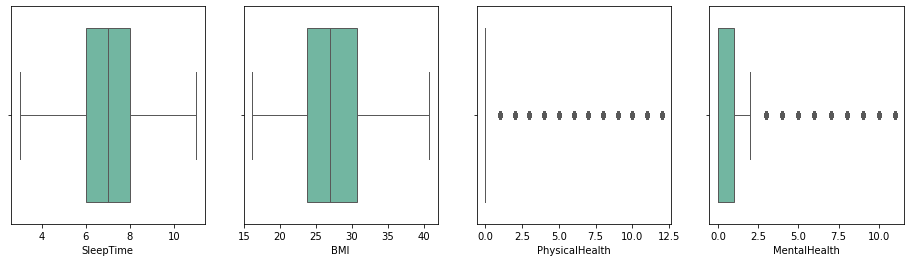

In [37]:
plt.subplots(1,4,figsize=(16,4))

plt.subplot(141)
sns.boxplot(train['SleepTime'],linewidth=1,palette='Set2')
plt.subplot(142)
sns.boxplot(train['BMI'],linewidth=1,palette='Set2')
plt.subplot(143)
sns.boxplot(train['PhysicalHealth'],linewidth=1,palette='Set2')
plt.subplot(144)
sns.boxplot(train['MentalHealth'],linewidth=1,palette='Set2')
plt.show()

In [38]:
train['Physical_MentalHealth'] = train['PhysicalHealth'] + train['MentalHealth']
test['Physical_MentalHealth'] = test['PhysicalHealth'] + test['MentalHealth']

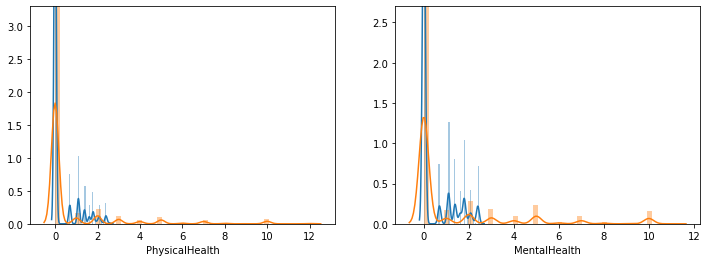

In [39]:
train['PhysicalHealth_log'] = np.log1p(train['PhysicalHealth'])   #Take the logarithm after adding 1
train['MentalHealth_log'] = np.log1p(train['MentalHealth'])

plt.subplots(1,2,figsize=(12,4))
plt.subplot(121)
sns.distplot(train['PhysicalHealth_log'])
sns.distplot(train['PhysicalHealth'])
plt.ylim(ymin=0,ymax=3.3)
plt.ylabel('')

plt.subplot(122)
sns.distplot(train['MentalHealth_log'])
sns.distplot(train['MentalHealth'])
plt.ylim(ymin=0,ymax=2.7)
plt.ylabel('')
plt.show()

In [40]:
test['PhysicalHealth_log'] = np.log1p(test['PhysicalHealth'])
test['MentalHealth_log'] = np.log1p(test['MentalHealth'])

In [41]:
train.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,...,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,Physical_MentalHealth,PhysicalHealth_log,MentalHealth_log
286929,0,22.67,1,0,0,0.0,1.0,0,1,2,...,0,1,0,7.0,0,0,0,1.0,0.000000,0.693147
112305,0,22.50,0,0,0,0.0,0.0,0,1,3,...,0,1,0,8.0,0,0,0,0.0,0.000000,0.000000
33692,0,32.55,0,0,0,0.0,0.0,0,0,6,...,0,1,1,7.0,1,0,0,0.0,0.000000,0.000000
280863,0,24.81,0,0,0,0.0,0.0,0,0,8,...,0,1,2,7.0,0,0,0,0.0,0.000000,0.000000
135463,1,32.02,1,0,0,3.0,0.0,0,0,6,...,1,1,2,8.0,0,0,0,3.0,1.386294,0.000000


In [42]:
y_train = train['HeartDisease']
X_train = train.drop('HeartDisease',axis=1)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, stratify=train['HeartDisease'], test_size=.2, random_state=1205)

y_test = test['HeartDisease']
X_test = test.drop('HeartDisease', axis=1)

<AxesSubplot:xlabel='Sex', ylabel='count'>

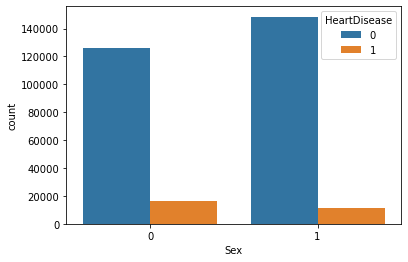

In [43]:
sns.countplot('Sex',data=data,hue='HeartDisease')

In [44]:
arr=['UnderWeight','Healthy','OverWeight','Obesity']
# # dict={arr[0]:18.49,arr[1]:}
# df[df['BMI'] <= 18.49]

In [45]:
data['Bmi_groups']=pd.cut(x=data['BMI'],bins=[0,18.5,25,30,50],labels=arr)

In [46]:
data.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer', 'Bmi_groups'],
      dtype='object')

<AxesSubplot:xlabel='Bmi_groups', ylabel='count'>

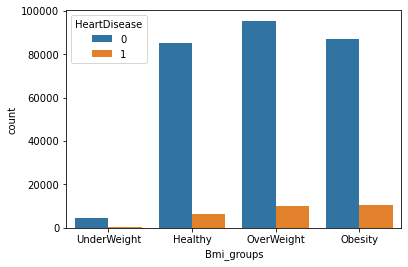

In [47]:
sns.countplot('Bmi_groups',hue='HeartDisease',data=data)

<AxesSubplot:xlabel='Smoking', ylabel='count'>

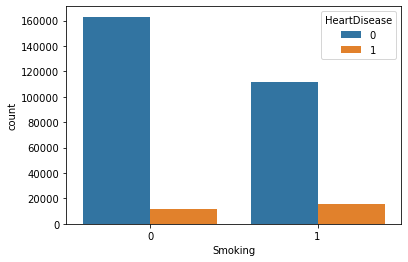

In [48]:
sns.countplot('Smoking',hue='HeartDisease',data=data)

<AxesSubplot:xlabel='Stroke', ylabel='count'>

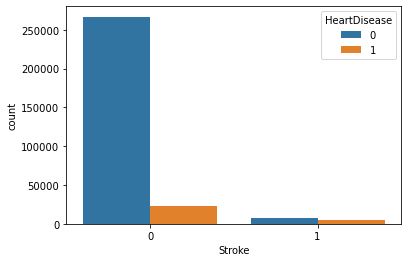

In [49]:
sns.countplot('Stroke',hue='HeartDisease',data=data)

<AxesSubplot:xlabel='AgeCategory', ylabel='count'>

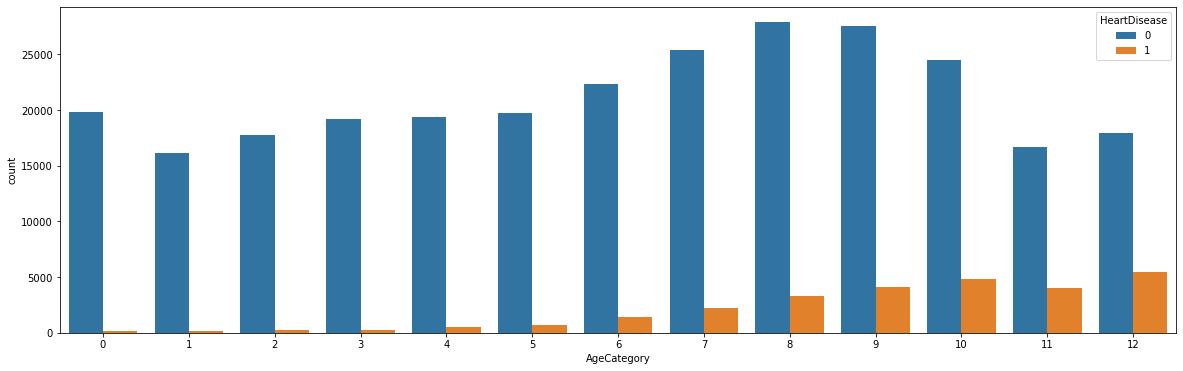

In [50]:
plt.figure(figsize=(20,6))
sns.countplot('AgeCategory',hue='HeartDisease',data=data)

<AxesSubplot:xlabel='Race', ylabel='count'>

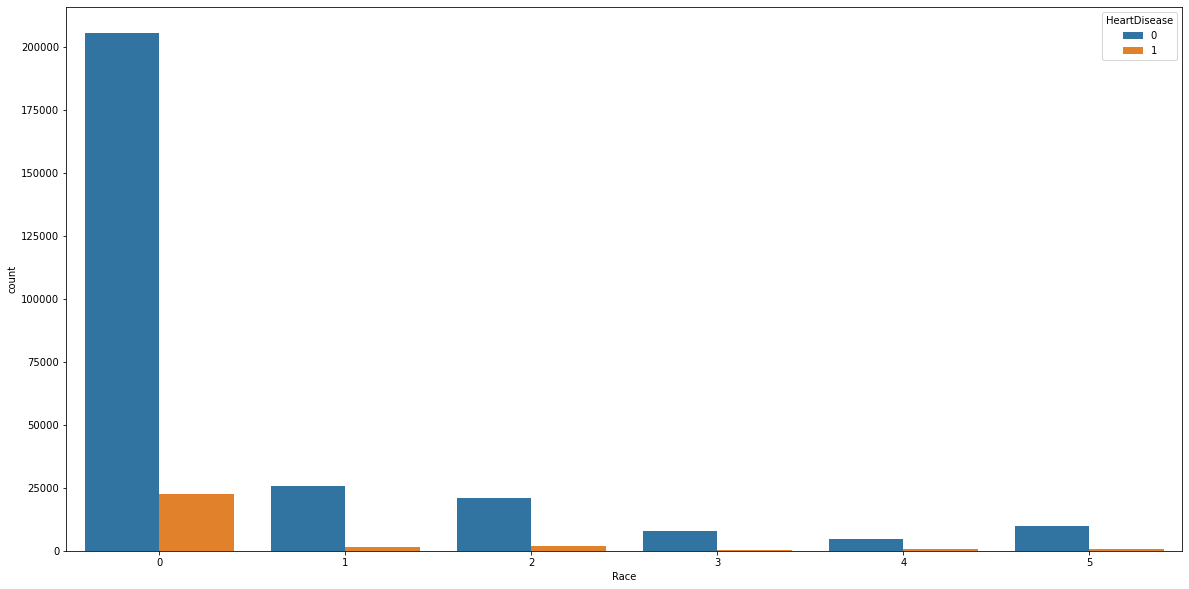

In [51]:
plt.figure(figsize=(20,10))
sns.countplot('Race',hue='HeartDisease',data=data)

<AxesSubplot:xlabel='Race', ylabel='count'>

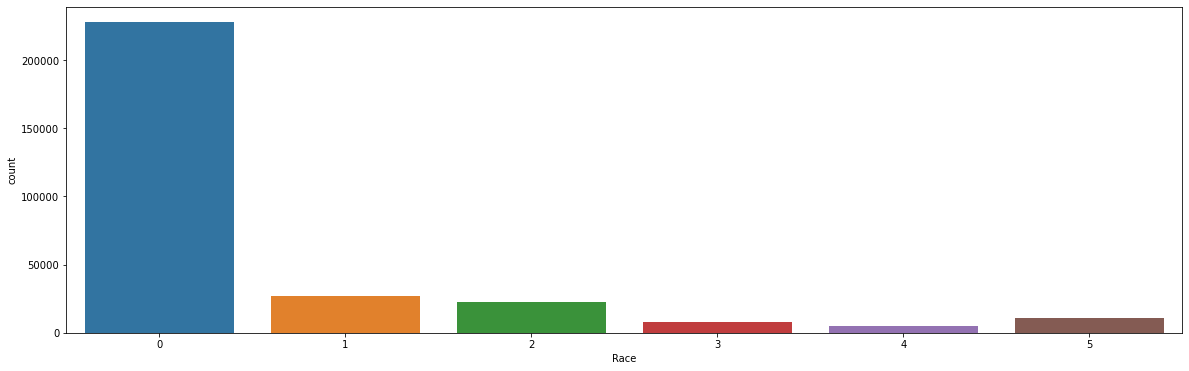

In [52]:
plt.figure(figsize=(20,6))
sns.countplot('Race',data=data)

In [53]:
from sklearn.linear_model import LogisticRegression

In [54]:
model_lr=LogisticRegression(max_iter=1000)
model_lr.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [55]:
model_lr.score(X_train,y_train)

0.9251796688201804

In [56]:
model1=model_lr.score(X_test,y_test)
model1

0.9252651880424301

In [104]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [58]:
y_predict_lr=model_lr.predict(X_test)

In [59]:
confusion_matrix(y_predict_lr,y_test)

array([[42024,  3219],
       [  191,   194]], dtype=int64)

In [60]:
from sklearn.metrics import classification_report

In [61]:
matrix = classification_report(y_predict_lr,y_test)
print('Classification report : \n',matrix)

Classification report : 
               precision    recall  f1-score   support

           0       1.00      0.93      0.96     45243
           1       0.06      0.50      0.10       385

    accuracy                           0.93     45628
   macro avg       0.53      0.72      0.53     45628
weighted avg       0.99      0.93      0.95     45628



In [62]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

In [63]:
scaler=StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [64]:
model_forest=RandomForestClassifier(n_estimators=28, max_depth=10, max_features='sqrt',criterion='gini',random_state=0)
model_forest.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, max_features='sqrt', n_estimators=28,
                       random_state=0)

In [86]:
rf=model_forest.score(X_train,y_train)
rf

0.9277556641066572

In [87]:
model2=model_forest.score(X_test,y_test)
model2

0.9256815990181467

In [89]:
y_pred = rf.predict(X_test)
y_pred

AttributeError: 'numpy.float64' object has no attribute 'predict'

In [67]:
from sklearn.tree import DecisionTreeClassifier  

In [68]:
model_decision= DecisionTreeClassifier(max_depth=10, max_features='sqrt',criterion='gini',random_state=123)
model_decision.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=10, max_features='sqrt', random_state=123)

In [69]:
model_decision.score(X_train,y_train)

0.9278104725170078

In [70]:
model3=model_decision.score(X_test,y_test)
model3

0.9236872096081353

In [71]:
from sklearn.svm import SVC
model_svc=SVC(random_state= 123)
model_svc.fit(X_train, y_train)

SVC(random_state=123)

In [72]:
model_svc.score(X_train,y_train)

0.9246315847166747

In [73]:
model4=model_decision.score(X_test,y_test)
model4

0.9236872096081353

In [74]:
from sklearn.neighbors import KNeighborsClassifier
model_KNN= KNeighborsClassifier( n_neighbors=5)
model_KNN.fit(X_train,y_train)

KNeighborsClassifier()

In [75]:
model_KNN.score(X_train,y_train)

0.931092126086748

In [76]:
model5= model_KNN.score(X_test,y_test)
model5

0.9188875252038222

In [77]:
from sklearn.naive_bayes import GaussianNB
model_nb = GaussianNB()

In [78]:
model_nb.fit(X_train, y_train)

GaussianNB()

In [79]:
y_pred = model_nb.predict(X_test)

In [80]:
model_nb.score(X_train,y_train)

0.8500441892808451

In [81]:
model6= model_nb.score(X_test,y_test)
model6

0.8500262996405715

In [82]:
models = pd.DataFrame({
    'Model' : ['Logistic Regression','Decision Tree', 'RandomForest', 'SVM','KNN', 'Naive Bayes'],
    'Score' : [model1*100,model3*100,model2*100,model4*100,model5*100, model6*100]
})


models.sort_values(by = 'Score', ascending = False)

,Model,Score
2,RandomForest,92.568160
0,Logistic Regression,92.526519
1,Decision Tree,92.368721
3,SVM,92.368721
4,KNN,91.888753
5,Naive Bayes,85.002630


In [84]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [99]:
#Undersampling ⬇️
#The classes (of HeartDisease) are distributed as the following in the train set:
pd.DataFrame(y_train.value_counts())

,HeartDisease
0,134962
1,11001


proportion 0 is more than ten times of 1. This time, we will use an undersampled ⬇️ version of the train set, where the classes are equally balanced.

In [100]:
Under_s = X_train.copy()
Under_s['HeartDisease'] = y_train
Under_0 = Under_s[Under_s['HeartDisease'] == 0].copy()
Under_1 = Under_s[Under_s['HeartDisease'] == 1].copy()

Under_Sample = pd.concat([Under_1, Under_0.sample(frac = len(Under_1)/len(Under_0))])

pd.DataFrame(Under_Sample['HeartDisease'].value_counts())

,HeartDisease
1,11001
0,11001


In [102]:
execution_time_fit = []
execution_time_predict = []

In [106]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

Accuracy Score:  0.730078022267029
Precision Score:  0.18859741168240643
Recall Score:  0.7899208907119836


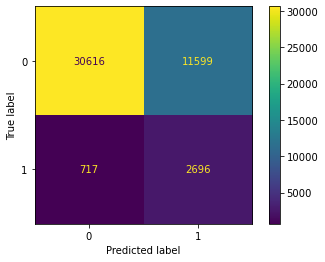

In [107]:
import time
Classifier_1_Under = LogisticRegression(max_iter = 300)

time_1_fit_start = time.time()

Classifier_1_Under.fit(Under_Sample.drop('HeartDisease', axis = 1), Under_Sample['HeartDisease'])

time_1_fit_end = time.time()
time_1_fit = time_1_fit_end - time_1_fit_start
execution_time_fit.append(time_1_fit)

time_1_predict_start = time.time()

Predictions_1_Under = Classifier_1_Under.predict(X_test)

time_1_predict_end = time.time()
time_1_predict = time_1_predict_end - time_1_predict_start
execution_time_predict.append(time_1_predict)


Confusion_Under = confusion_matrix(y_test, Predictions_1_Under)
Display = ConfusionMatrixDisplay(confusion_matrix=Confusion_Under)
Display.plot()

print('Accuracy Score: ', accuracy_score(y_test, Predictions_1_Under))
print('Precision Score: ', precision_score(y_test, Predictions_1_Under))
print('Recall Score: ', recall_score(y_test, Predictions_1_Under))

Accuracy Score:  0.6929955290611028
Precision Score:  0.15762941898791444
Recall Score:  0.7146205684148843


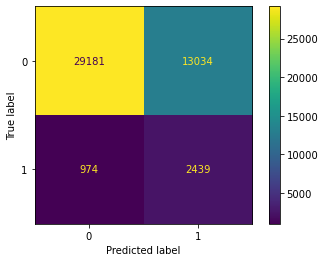

In [109]:
Classifier_2 = KNeighborsClassifier(n_neighbors=5)

time_2_fit_start = time.time()

Classifier_2.fit(Under_Sample.drop('HeartDisease', axis = 1), Under_Sample['HeartDisease'])

time_2_fit_end = time.time()
time_2_fit = time_2_fit_end - time_2_fit_start
execution_time_fit.append(time_2_fit)

time_2_predict_start = time.time()

Predictions_2 = Classifier_2.predict(X_test)

time_2_predict_end = time.time()
time_2_predict = time_2_predict_end - time_2_predict_start
execution_time_predict.append(time_2_predict)

Confusion_2 = confusion_matrix(y_test, Predictions_2)
Display = ConfusionMatrixDisplay(confusion_matrix=Confusion_2)

Display.plot()

print('Accuracy Score: ', accuracy_score(y_test, Predictions_2))
print('Precision Score: ', precision_score(y_test, Predictions_2))
print('Recall Score: ', recall_score(y_test, Predictions_2))

Accuracy Score:  0.7030989743140177
Precision Score:  0.16730137885751806
Recall Score:  0.7465572809844712


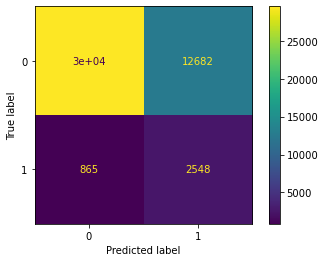

In [110]:
Classifier_3 = RandomForestClassifier(n_estimators=25)

time_3_fit_start = time.time()

Classifier_3.fit(Under_Sample.drop('HeartDisease', axis = 1), Under_Sample['HeartDisease'])

time_3_fit_end = time.time()
time_3_fit = time_3_fit_end - time_3_fit_start
execution_time_fit.append(time_3_fit)

time_3_predict_start = time.time()

Predictions_3 = Classifier_3.predict(X_test)

time_3_predict_end = time.time()
time_3_predict = time_3_predict_end - time_3_predict_start
execution_time_predict.append(time_3_predict)

Confusion_3 = confusion_matrix(y_test, Predictions_3)
Display = ConfusionMatrixDisplay(confusion_matrix=Confusion_3)
Display.plot()
print('Accuracy Score: ', accuracy_score(y_test, Predictions_3))
print('Precision Score: ', precision_score(y_test, Predictions_3))
print('Recall Score: ', recall_score(y_test, Predictions_3))

Accuracy Score:  0.6971815551854125
Precision Score:  0.16942043721403152
Recall Score:  0.7811309698212716


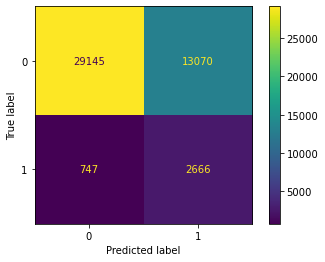

In [112]:
Classifier_4 = DecisionTreeClassifier(max_depth=10, max_features='sqrt',criterion='gini',random_state=123)

time_4_fit_start = time.time()

Classifier_4.fit(Under_Sample.drop('HeartDisease', axis = 1), Under_Sample['HeartDisease'])

time_4_fit_end = time.time()
time_4_fit = time_4_fit_end - time_4_fit_start
execution_time_fit.append(time_4_fit)

time_4_predict_start = time.time()

Predictions_4 = Classifier_4.predict(X_test)

time_4_predict_end = time.time()
time_4_predict = time_4_predict_end - time_4_predict_start
execution_time_predict.append(time_4_predict)

Confusion_4 = confusion_matrix(y_test, Predictions_4)
Display = ConfusionMatrixDisplay(confusion_matrix=Confusion_4)
Display.plot()
print('Accuracy Score: ', accuracy_score(y_test, Predictions_4))
print('Precision Score: ', precision_score(y_test, Predictions_4))
print('Recall Score: ', recall_score(y_test, Predictions_4))

Accuracy Score:  0.7030551415797317
Precision Score:  0.1766619880056144
Recall Score:  0.811309698212716


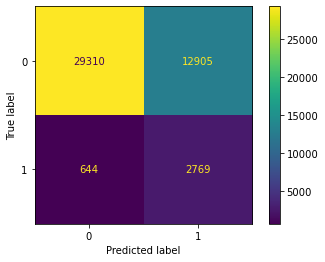

In [113]:
Classifier_5 = SVC(random_state=123)

time_5_fit_start = time.time()

Classifier_5.fit(Under_Sample.drop('HeartDisease', axis = 1), Under_Sample['HeartDisease'])

time_5_fit_end = time.time()
time_5_fit = time_5_fit_end - time_5_fit_start
execution_time_fit.append(time_5_fit)

time_5_predict_start = time.time()

Predictions_5 = Classifier_5.predict(X_test)

time_5_predict_end = time.time()
time_5_predict = time_5_predict_end - time_5_predict_start
execution_time_predict.append(time_5_predict)

Confusion_5 = confusion_matrix(y_test, Predictions_5)
Display = ConfusionMatrixDisplay(confusion_matrix=Confusion_5)
Display.plot()
print('Accuracy Score: ', accuracy_score(y_test, Predictions_5))
print('Precision Score: ', precision_score(y_test, Predictions_5))
print('Recall Score: ', recall_score(y_test, Predictions_5))

Accuracy Score:  0.7853511002016306
Precision Score:  0.19295544220960448
Recall Score:  0.5874597128625842


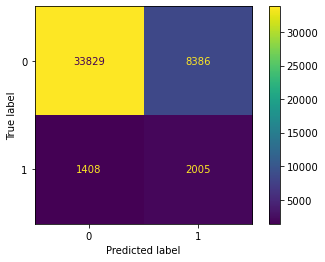

In [114]:
Classifier_6 = GaussianNB()

time_6_fit_start = time.time()

Classifier_6.fit(Under_Sample.drop('HeartDisease', axis = 1), Under_Sample['HeartDisease'])

time_6_fit_end = time.time()
time_6_fit = time_6_fit_end - time_6_fit_start
execution_time_fit.append(time_6_fit)

time_6_predict_start = time.time()

Predictions_6 = Classifier_6.predict(X_test)

time_6_predict_end = time.time()
time_6_predict = time_6_predict_end - time_6_predict_start
execution_time_predict.append(time_6_predict)

Confusion_6 = confusion_matrix(y_test, Predictions_6)
Display = ConfusionMatrixDisplay(confusion_matrix=Confusion_6)
Display.plot()
print('Accuracy Score: ', accuracy_score(y_test, Predictions_6))
print('Precision Score: ', precision_score(y_test, Predictions_6))
print('Recall Score: ', recall_score(y_test, Predictions_6))

In [120]:
from sklearn.metrics import roc_curve

Text(0.5, 0, 'FPR')

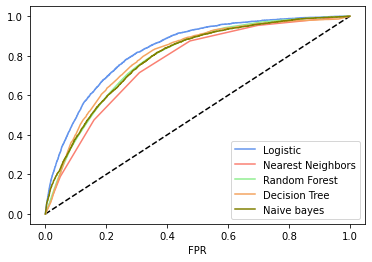

In [124]:
y_pred_prob1 = Classifier_1_Under.predict_proba(X_test)[:,1]
fpr1 , tpr1, thresholds1 = roc_curve(y_test, y_pred_prob1)

y_pred_prob2 = Classifier_2.predict_proba(X_test)[:,1]
fpr2 , tpr2, thresholds2 = roc_curve(y_test, y_pred_prob2)


y_pred_prob3 = Classifier_3.predict_proba(X_test)[:,1]
fpr3 , tpr3, thresholds3 = roc_curve(y_test, y_pred_prob3)

y_pred_prob4 = Classifier_4.predict_proba(X_test)[:,1]
fpr4 , tpr4, thresholds4 = roc_curve(y_test, y_pred_prob4)



y_pred_prob6 = Classifier_6.predict_proba(X_test)[:,1]
fpr6 , tpr6, thresholds6 = roc_curve(y_test, y_pred_prob6)

plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr1, tpr1, label= "Logistic", color = 'cornflowerblue')
plt.plot(fpr2, tpr2, label= "Nearest Neighbors", color = 'salmon')
plt.plot(fpr3, tpr3, label= "Random Forest", color = 'lightgreen')
plt.plot(fpr4, tpr4, label= "Decision Tree", color = 'sandybrown')
plt.plot(fpr6, tpr6, label= "Naive bayes", color = 'olive')
plt.legend()
plt.xlabel("FPR")


Accuracy Score:  0.7297054440255983
Precision Score:  0.18806826129528606
Recall Score:  0.7878699091708175


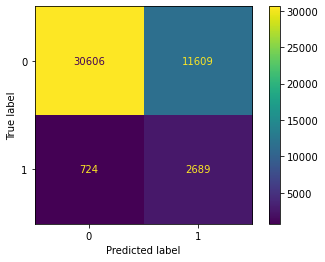

In [125]:
Streamlit = ['BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer']

Classifier_Streamlit = LogisticRegression(max_iter = 300)

Classifier_Streamlit.fit(Under_Sample[Streamlit], Under_Sample['HeartDisease'])

Predictions_Streamlit = Classifier_Streamlit.predict(X_test[Streamlit])

Confusion_Streamlit = confusion_matrix(y_test, Predictions_Streamlit)
Display = ConfusionMatrixDisplay(confusion_matrix=Confusion_Streamlit)
Display.plot()

print('Accuracy Score: ', accuracy_score(y_test, Predictions_Streamlit))
print('Precision Score: ', precision_score(y_test, Predictions_Streamlit))
print('Recall Score: ', recall_score(y_test, Predictions_Streamlit))